In [1]:
#installation of all the necessary libraries for the Skin cancer detection analysis
import pandas as pd
import numpy as np
import matplotlib.image as mpimg
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, add, Activation, Dropout, MaxPooling2D, Conv2D, Flatten
import os

Using TensorFlow backend.


In [2]:
#Step 1: To extract all the images from the dataset, of around 10015 images split into 2 sections. Importing both the folder's
#images
path1 = r"C:\Users\Lokesh\Desktop\Machine_Learning Datasets\HealthCare_Skin Cancer\skin-cancer-mnist-ham10000\HAM10000_images_part_1"
path2 = r"C:\Users\Lokesh\Desktop\Machine_Learning Datasets\HealthCare_Skin Cancer\skin-cancer-mnist-ham10000\HAM10000_images_part_2"
set1 = os.listdir(path1)
set2 = os.listdir(path2)
s1 = set1
s2 = set2
for i in range(0,len(s1)):
    s1[i] = os.path.abspath(os.path.join(path1, set1[i]))
for i in range(0,len(s2)):
    s2[i] = os.path.abspath(os.path.join(path2, set2[i]))

In [3]:
#To verify all the images have the same shape as te other images
print(mpimg.imread(s1[1]).shape,mpimg.imread(s1[1589]).shape,mpimg.imread(s1[4783]).shape,mpimg.imread(s1[3696]).shape,
      mpimg.imread(s2[1589]).shape,mpimg.imread(s2[548]).shape,mpimg.imread(s2[1214]).shape,
      mpimg.imread(s1[4999]).shape,mpimg.imread(s2[4999]).shape,mpimg.imread(s2[1912]).shape)

(450, 600, 3) (450, 600, 3) (450, 600, 3) (450, 600, 3) (450, 600, 3) (450, 600, 3) (450, 600, 3) (450, 600, 3) (450, 600, 3) (450, 600, 3)


In [4]:
#Reshaping all the images into 64 x 64 array for ease of computation in my laptop
SK1 = np.zeros([5000, 64, 64])
for i in range(0,len(s1)):
    aa = mpimg.imread(s1[i])
    SK1[i] = np.resize(aa, (64, 64))

In [5]:
#Reshaping all the images into 64 x 64 array for ease of computation in my laptop
SK2 = np.zeros([5015, 64, 64])
for i in range(0,len(s2)):
    bb = mpimg.imread(s2[i])
    SK2[i] = np.resize(bb, (64, 64))

In [6]:
#Reshaping the input independant variable from 3D to 4D array.
X = np.concatenate((SK1, SK2), axis=0)
X = X.reshape(X.shape[0], X.shape[1], X.shape[2], 1)

In [7]:
#Importing the target variables dataset and sort the rows inorder of the images available
labels = pd.read_csv("HAM10000_metadata.csv")
labels = labels.sort_values(by=['image_id']).reset_index().drop(columns={"index"})

In [8]:
#Exploting the target dataset and we split the 5 of the available columns to be each target variable to be analyzed.
y1 = pd.get_dummies(labels["dx"], prefix='dx')
y1 = y1.drop(columns={"dx_df"})
y1 = np.array(y1)

y2 = pd.get_dummies(labels["dx_type"], prefix='dx_type')
y2 = y2.drop(columns={"dx_type_confocal"})
y2 = np.array(y2)

y3 = pd.get_dummies(labels["sex"], prefix='sex')
y3 = y3.drop(columns={"sex_unknown"})
y3 = np.array(y3)

y4 = pd.get_dummies(labels["localization"], prefix='lcl')
y4 = y4.drop(columns={"lcl_acral"})
y4 = np.array(y4)

y5 = labels["age"]
y5 = y5.fillna(0)
y5 = np.array(y5)

#### The First analysis would be on the "dx_type" variable and we apply the Convolutional Neural Network to find the best fit approach

In [9]:
#Acquiring the training and the test dataset for the dxtype modelling
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.39, random_state=42)
print(X2_train.shape, X2_test.shape, y2_train.shape, y2_test.shape)

(6109, 64, 64, 1) (3906, 64, 64, 1) (6109, 3) (3906, 3)


In [11]:
#Building the layers of neural network to have dual convolutional layer, Maxpooling layer and 5 hidden layers.
#The final approach is an binary classification of present or not of the 3 output variables.
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), input_shape=(64, 64, 1), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(32, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Flatten())

model2.add(Dense(500, kernel_initializer='normal', activation='relu'))
model2.add(Dropout(0.3))
model2.add(Dense(243, activation='relu'))
model2.add(Dropout(0.3))
model2.add(Dense(81, activation='relu'))
model2.add(Dropout(0.3))
model2.add(Dense(27, activation='relu'))
model2.add(Dropout(0.3))
model2.add(Dense(9, activation='relu'))
model2.add(Dropout(0.3))
model2.add(Dense(3, activation='sigmoid'))

model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
# Model Fit
H2 = model2.fit(X2_train, y2_train, epochs=50, batch_size=100, verbose=1, validation_split=0.2)

Train on 4887 samples, validate on 1222 samples
Epoch 1/50
4887/4887 [==============================] - 31s 6ms/step - loss: 2.1529 - acc: 0.6375 - val_loss: 0.6839 - val_acc: 0.6882
Epoch 2/50
4887/4887 [==============================] - 31s 6ms/step - loss: 0.6530 - acc: 0.6722 - val_loss: 0.6575 - val_acc: 0.6882
Epoch 3/50
4887/4887 [==============================] - 29s 6ms/step - loss: 0.6615 - acc: 0.6834 - val_loss: 0.6382 - val_acc: 0.6879
Epoch 4/50
4887/4887 [==============================] - 29s 6ms/step - loss: 0.6366 - acc: 0.6857 - val_loss: 0.6200 - val_acc: 0.6882
Epoch 5/50
4887/4887 [==============================] - 29s 6ms/step - loss: 0.6207 - acc: 0.6871 - val_loss: 0.6030 - val_acc: 0.6882
Epoch 6/50
4887/4887 [==============================] - 29s 6ms/step - loss: 0.6020 - acc: 0.6900 - val_loss: 0.5743 - val_acc: 0.6882
Epoch 7/50
4887/4887 [==============================] - 29s 6ms/step - loss: 0.5852 - acc: 0.6903 - val_loss: 0.5591 - val_acc: 0.6882
Epoch 8

In [19]:
# The test accuracy of the model built is 91.9%, with the predicted value against the test value hovering over 85%
y2_pred = model2.predict(X2_test)
print("The accuracy of the model:", (1-np.mean(np.abs(y2_pred-y2_test))))
print("The score and accuracy of the model : ", model2.evaluate(X2_test, y2_test))

The accuracy of the model: 0.8673030138015747
3906/3906 [==============================] - 9s 2ms/step
The score and accuracy of the model :  [0.2568029797713702, 0.9193548416395524]


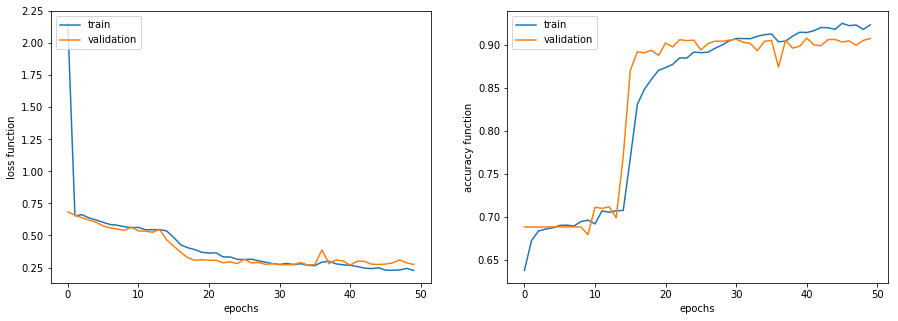

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(H2.history["loss"], label='train')
plt.plot(H2.history["val_loss"], label='validation')
plt.xlabel('epochs')
plt.ylabel('loss function')
plt.legend(loc='upper left')
plt.subplot(1,2,2)
plt.plot(H2.history["acc"], label='train')
plt.plot(H2.history["val_acc"], label='validation')
plt.xlabel('epochs')
plt.ylabel('accuracy function')
plt.legend(loc='upper left')
plt.show()

#### The Second analysis would be on the "gender" variable and we apply the Convolutional Neural Network to find the best fit approach

In [16]:
#Acquiring the training and the test dataset for the gender modelling
X3_train, X3_test, y3_train, y3_test = train_test_split(X, y3, test_size=0.39, random_state=42)
print(X3_train.shape, X3_test.shape, y3_train.shape, y3_test.shape)

(6109, 64, 64, 1) (3906, 64, 64, 1) (6109, 2) (3906, 2)


In [17]:
#Building the layers of neural network to have dual convolutional layer, Maxpooling layer and 3 hidden layers.
#The final approach is an binary classification of present or not of the 2 output variables.
model3 = Sequential()
model3.add(Conv2D(32, (3, 3), input_shape=(64, 64, 1), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Conv2D(32, (3, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Flatten())

model3.add(Dense(100, activation='relu'))
model3.add(Dropout(0.1))
model3.add(Dense(40, activation='relu'))
model3.add(Dropout(0.1))
model3.add(Dense(20, activation='relu'))
model3.add(Dropout(0.1))
model3.add(Dense(2, activation='sigmoid'))

model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
# Model Fit
H3 = model3.fit(X3_train, y3_train, epochs=50, batch_size=100, verbose=1, validation_split=0.2)

Train on 4887 samples, validate on 1222 samples
Epoch 1/50
4887/4887 [==============================] - 27s 6ms/step - loss: 7.3392 - acc: 0.5349 - val_loss: 7.1491 - val_acc: 0.5540
Epoch 2/50
4887/4887 [==============================] - 26s 5ms/step - loss: 6.9226 - acc: 0.5386 - val_loss: 0.7856 - val_acc: 0.4775
Epoch 3/50
4887/4887 [==============================] - 26s 5ms/step - loss: 0.7000 - acc: 0.5382 - val_loss: 0.6888 - val_acc: 0.5499
Epoch 4/50
4887/4887 [==============================] - 26s 5ms/step - loss: 0.6896 - acc: 0.5425 - val_loss: 0.6877 - val_acc: 0.5536
Epoch 5/50
4887/4887 [==============================] - 26s 5ms/step - loss: 0.6893 - acc: 0.5436 - val_loss: 0.6876 - val_acc: 0.5532
Epoch 6/50
4887/4887 [==============================] - 26s 5ms/step - loss: 0.6891 - acc: 0.5438 - val_loss: 0.6878 - val_acc: 0.5524
Epoch 7/50
4887/4887 [==============================] - 26s 5ms/step - loss: 0.6888 - acc: 0.5444 - val_loss: 0.6877 - val_acc: 0.5536
Epoch 8

In [21]:
# The test accuracy of the model built is 53.6%, with the predicted value against the test value hovering over 50%
y3_pred = model3.predict(X3_test)
print("The accuracy of the model:", (1-np.mean(np.abs(y3_pred-y3_test))))
print("The score and accuracy of the model : ", model3.evaluate(X3_test, y3_test))

The accuracy of the model: 0.5036745369434357
3906/3906 [==============================] - 8s 2ms/step
The score and accuracy of the model :  [0.6932833695863371, 0.536610343061956]


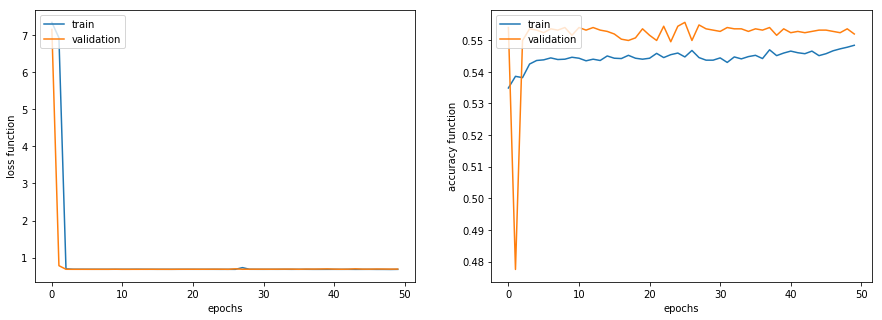

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(H3.history["loss"], label='train')
plt.plot(H3.history["val_loss"], label='validation')
plt.xlabel('epochs')
plt.ylabel('loss function')
plt.legend(loc='upper left')
plt.subplot(1,2,2)
plt.plot(H3.history["acc"], label='train')
plt.plot(H3.history["val_acc"], label='validation')
plt.xlabel('epochs')
plt.ylabel('accuracy function')
plt.legend(loc='upper left')
plt.show()

#### The Third analysis would be on the "localization of cancer" variable and we apply the Convolutional Neural Network to find the best fit approach

In [23]:
#Acquiring the training and the test dataset for the cancer localization modelling
X4_train, X4_test, y4_train, y4_test = train_test_split(X, y4, test_size=0.39, random_state=42)
print(X4_train.shape, X4_test.shape, y4_train.shape, y4_test.shape)

(6109, 64, 64, 1) (3906, 64, 64, 1) (6109, 14) (3906, 14)


In [24]:
#Building the layers of neural network to have dual convolutional layer, Maxpooling layer and 3 hidden layers.
#The final approach is an binary classification of present or not of the 14 output variables.
model4 = Sequential()
model4.add(Conv2D(32, (3, 3), input_shape=(64, 64, 1), activation='relu'))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Conv2D(32, (3, 3), activation='relu'))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Flatten())

model4.add(Dense(100, activation='relu'))
model4.add(Dropout(0.1))
model4.add(Dense(40, activation='relu'))
model4.add(Dropout(0.1))
model4.add(Dense(20, activation='relu'))
model4.add(Dropout(0.1))
model4.add(Dense(14, activation='sigmoid'))

model4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
# Model Fit
H4 = model4.fit(X4_train, y4_train, epochs=50, batch_size=100, verbose=1, validation_split=0.2)

Train on 4887 samples, validate on 1222 samples
Epoch 1/50
4887/4887 [==============================] - 27s 6ms/step - loss: 1.0130 - acc: 0.7897 - val_loss: 0.2954 - val_acc: 0.9281
Epoch 2/50
4887/4887 [==============================] - 26s 5ms/step - loss: 0.3303 - acc: 0.8835 - val_loss: 0.2499 - val_acc: 0.9286
Epoch 3/50
4887/4887 [==============================] - 26s 5ms/step - loss: 0.2861 - acc: 0.9080 - val_loss: 0.2372 - val_acc: 0.9286
Epoch 4/50
4887/4887 [==============================] - 26s 5ms/step - loss: 0.2641 - acc: 0.9199 - val_loss: 0.2312 - val_acc: 0.9286
Epoch 5/50
4887/4887 [==============================] - 26s 5ms/step - loss: 0.2539 - acc: 0.9233 - val_loss: 0.2278 - val_acc: 0.9286
Epoch 6/50
4887/4887 [==============================] - 26s 5ms/step - loss: 0.2462 - acc: 0.9252 - val_loss: 0.2261 - val_acc: 0.9286
Epoch 7/50
4887/4887 [==============================] - 26s 5ms/step - loss: 0.2429 - acc: 0.9257 - val_loss: 0.2250 - val_acc: 0.9286
Epoch 8

In [26]:
# The test accuracy of the model built is 92.8%, with the predicted value against the test value hovering over 88%
y4_pred = model4.predict(X4_test)
print("The accuracy of the model:", (1-np.mean(np.abs(y4_pred-y4_test))))
print("The score and accuracy of the model : ", model4.evaluate(X4_test, y4_test))

The accuracy of the model: 0.8809560760855675
3906/3906 [==============================] - 8s 2ms/step
The score and accuracy of the model :  [0.21279142415499114, 0.9284616816489439]


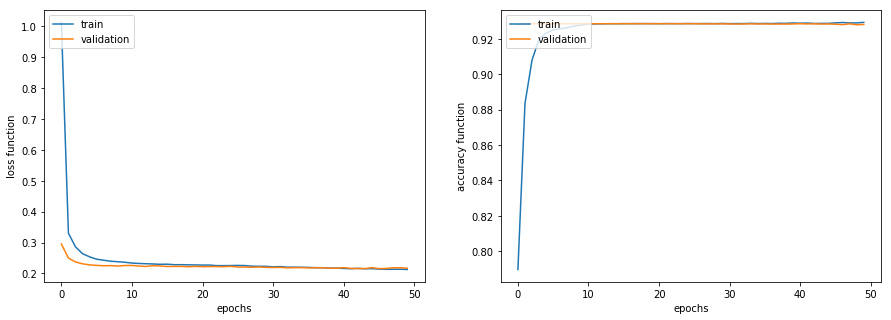

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(H4.history["loss"], label='train')
plt.plot(H4.history["val_loss"], label='validation')
plt.xlabel('epochs')
plt.ylabel('loss function')
plt.legend(loc='upper left')
plt.subplot(1,2,2)
plt.plot(H4.history["acc"], label='train')
plt.plot(H4.history["val_acc"], label='validation')
plt.xlabel('epochs')
plt.ylabel('accuracy function')
plt.legend(loc='upper left')
plt.show()

#### The Fourth and final classification analysis would be on the "dx of cancer" variable and we apply the Convolutional Neural Network to find the best fit approach

In [28]:
#Acquiring the training and the test dataset for the cancer dx modelling
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.39, random_state=42)
print(X1_train.shape, X1_test.shape, y1_train.shape, y1_test.shape)

(6109, 64, 64, 1) (3906, 64, 64, 1) (6109, 6) (3906, 6)


In [29]:
#Building the layers of neural network to have dual convolutional layer, Maxpooling layer and 3 hidden layers.
#The final approach is an binary classification of present or not of the 6 output variables.
model1 = Sequential()
model1.add(Conv2D(32, (3, 3), input_shape=(64, 64, 1), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Conv2D(32, (3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Flatten())

model1.add(Dense(256, activation='relu'))
model1.add(Dropout(0.1))
model1.add(Dense(128, activation='relu'))
model1.add(Dropout(0.1))
model1.add(Dense(36, activation='relu'))
model1.add(Dropout(0.1))
model1.add(Dense(6, activation='sigmoid'))

model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [30]:
# Model Fit
H1 = model1.fit(X1_train, y1_train, epochs=50, batch_size=100, verbose=1, validation_split=0.2)

Train on 4887 samples, validate on 1222 samples
Epoch 1/50
4887/4887 [==============================] - 29s 6ms/step - loss: 0.8828 - acc: 0.8682 - val_loss: 0.2907 - val_acc: 0.8905
Epoch 2/50
4887/4887 [==============================] - 27s 6ms/step - loss: 0.3010 - acc: 0.8884 - val_loss: 0.2877 - val_acc: 0.8906
Epoch 3/50
4887/4887 [==============================] - 27s 6ms/step - loss: 0.2955 - acc: 0.8898 - val_loss: 0.2826 - val_acc: 0.8905
Epoch 4/50
4887/4887 [==============================] - 27s 6ms/step - loss: 0.2833 - acc: 0.8934 - val_loss: 0.2758 - val_acc: 0.8932
Epoch 5/50
4887/4887 [==============================] - 27s 6ms/step - loss: 0.2773 - acc: 0.8951 - val_loss: 0.2736 - val_acc: 0.8955
Epoch 6/50
4887/4887 [==============================] - 27s 6ms/step - loss: 0.2729 - acc: 0.8969 - val_loss: 0.2686 - val_acc: 0.8951
Epoch 7/50
4887/4887 [==============================] - 27s 6ms/step - loss: 0.2721 - acc: 0.8973 - val_loss: 0.2702 - val_acc: 0.8946
Epoch 8

In [31]:
# The test accuracy of the model built is 89.4%, with the predicted value against the test value hovering over 87%
y1_pred = model1.predict(X1_test)
print("The accuracy of the model:", (1-np.mean(np.abs(y1_pred-y1_test))))
print("The score and accuracy of the model : ", model1.evaluate(X1_test, y1_test))

The accuracy of the model: 0.8727651834487915
3906/3906 [==============================] - 8s 2ms/step
The score and accuracy of the model :  [0.3510901414155264, 0.8936252037317889]


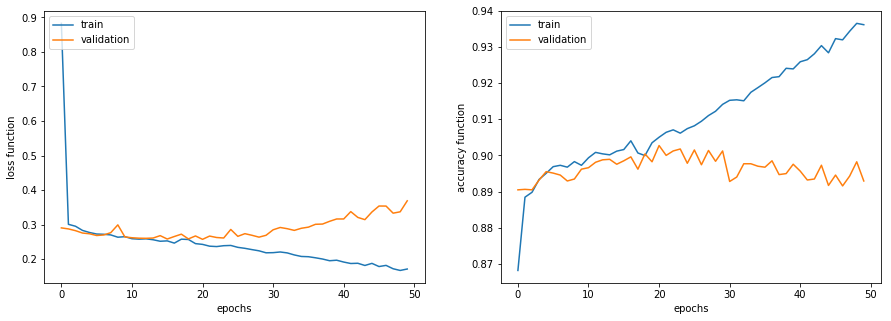

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(H1.history["loss"], label='train')
plt.plot(H1.history["val_loss"], label='validation')
plt.xlabel('epochs')
plt.ylabel('loss function')
plt.legend(loc='upper left')
plt.subplot(1,2,2)
plt.plot(H1.history["acc"], label='train')
plt.plot(H1.history["val_acc"], label='validation')
plt.xlabel('epochs')
plt.ylabel('accuracy function')
plt.legend(loc='upper left')
plt.show()

#### The next analysis would be on the "age prediction" variable and we apply the Convolutional Neural Network to find the best fit approach

In [33]:
#Acquiring the training and the test dataset for the cancer patients age modelling
X5_train, X5_test, y5_train, y5_test = train_test_split(X, y5, test_size=0.39, random_state=42)
print(X5_train.shape, X5_test.shape, y5_train.shape, y5_test.shape)

(6109, 64, 64, 1) (3906, 64, 64, 1) (6109,) (3906,)


In [34]:
#Building the layers of neural network to have dual convolutional layer, Maxpooling layer and 4 hidden layers.
#The final approach is an prediction modelling the age of cancer patients.
model5 = Sequential()
model5.add(Conv2D(32, (3, 3), input_shape=(64, 64, 1), activation='relu'))
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Conv2D(32, (3, 3), activation='relu'))
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Flatten())

model5.add(Dense(729, activation='relu'))
model5.add(Dropout(0.1))
model5.add(Dense(500, activation='relu'))
model5.add(Dropout(0.1))
model5.add(Dense(81, activation='relu'))
model5.add(Dropout(0.1))
model5.add(Dense(9, activation='relu'))
model5.add(Dropout(0.1))
model5.add(Dense(1, activation='linear'))

model5.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse', 'mae'])

In [35]:
# Model Fit
H5 = model5.fit(X5_train, y5_train, epochs=50, batch_size=100, verbose=1, validation_split=0.2)

Train on 4887 samples, validate on 1222 samples
Epoch 1/50
4887/4887 [==============================] - 34s 7ms/step - loss: 16017.9507 - mean_squared_error: 16017.9507 - mean_absolute_error: 42.1344 - val_loss: 427.8032 - val_mean_squared_error: 427.8032 - val_mean_absolute_error: 16.4041
Epoch 2/50
4887/4887 [==============================] - 32s 6ms/step - loss: 522.4776 - mean_squared_error: 522.4776 - mean_absolute_error: 18.2366 - val_loss: 349.0104 - val_mean_squared_error: 349.0104 - val_mean_absolute_error: 14.7083
Epoch 3/50
4887/4887 [==============================] - 32s 7ms/step - loss: 490.6953 - mean_squared_error: 490.6953 - mean_absolute_error: 17.6641 - val_loss: 365.3966 - val_mean_squared_error: 365.3966 - val_mean_absolute_error: 15.1088
Epoch 4/50
4887/4887 [==============================] - 32s 7ms/step - loss: 478.7203 - mean_squared_error: 478.7203 - mean_absolute_error: 17.2329 - val_loss: 353.2469 - val_mean_squared_error: 353.2469 - val_mean_absolute_error: 

Epoch 35/50
4887/4887 [==============================] - 40s 8ms/step - loss: 349.9545 - mean_squared_error: 349.9545 - mean_absolute_error: 14.6451 - val_loss: 378.4804 - val_mean_squared_error: 378.4804 - val_mean_absolute_error: 15.4050
Epoch 36/50
4887/4887 [==============================] - 40s 8ms/step - loss: 346.6180 - mean_squared_error: 346.6180 - mean_absolute_error: 14.7076 - val_loss: 387.4726 - val_mean_squared_error: 387.4726 - val_mean_absolute_error: 15.7045
Epoch 37/50
4887/4887 [==============================] - 40s 8ms/step - loss: 343.5284 - mean_squared_error: 343.5284 - mean_absolute_error: 14.7291 - val_loss: 333.5444 - val_mean_squared_error: 333.5444 - val_mean_absolute_error: 14.1860
Epoch 38/50
4887/4887 [==============================] - 40s 8ms/step - loss: 373.3959 - mean_squared_error: 373.3959 - mean_absolute_error: 15.2592 - val_loss: 456.9160 - val_mean_squared_error: 456.9160 - val_mean_absolute_error: 17.2200
Epoch 39/50
4887/4887 [=================

In [37]:
y5_pred = model5.predict(X5_test)
print("The accuracy of the model:", (1-np.mean(np.abs(1-y5_pred+1/y5_test+1))))
print("The score and accuracy of the model : ", model5.evaluate(X5_test, y5_test))

C:\Users\Lokesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


The accuracy of the model: -inf
3906/3906 [==============================] - 10s 3ms/step
The score and accuracy of the model :  [358.6128392060842, 358.6128392060842, 15.059877225697132]


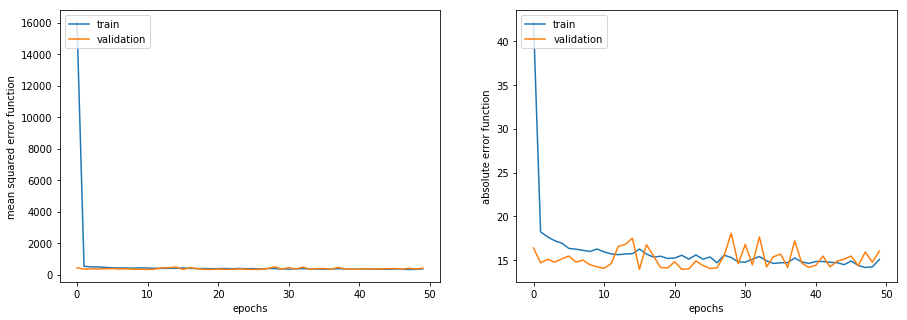

In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(H5.history["mean_squared_error"], label='train')
plt.plot(H5.history["val_mean_squared_error"], label='validation')
plt.xlabel('epochs')
plt.ylabel('mean squared error function')
plt.legend(loc='upper left')
plt.subplot(1,2,2)
plt.plot(H5.history["mean_absolute_error"], label='train')
plt.plot(H5.history["val_mean_absolute_error"], label='validation')
plt.xlabel('epochs')
plt.ylabel('absolute error function')
plt.legend(loc='upper left')
plt.show()